In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

from os import path

In [3]:
datadir = '../../PhD/data/WES2020/data_noSync/FINO/FINOI_Wind/'

wind_dir = pd.read_csv(path.join(datadir, 'FINO1_winddirection_usa_82m_311deg_20190801_20200530.dat'),
                       skiprows=6,
                       sep='\t',
                       names=['date', 'dir', 'dir_std', 'dir_q']
                      )
wind_dir.date = pd.to_datetime(wind_dir.date, utc=True)
wind_dir.set_index('date', inplace=True)

wind_speed = pd.read_csv(path.join(datadir, 'FINO1_windspeed_usa_82m_311deg_20190801_20200530.dat'),
                         skiprows=6,
                         sep='\t',
                         names=['date', 'speed_mean', 'speed_min', 'speed_max', 'speed_std', 'speed_q']
                        )
wind_speed.date = pd.to_datetime(wind_speed.date, utc=True)
wind_speed.set_index('date', inplace=True)

wind = pd.merge(wind_speed, wind_dir, left_index=True, right_index=True)

wind.drop(wind[ wind.speed_mean < 0 ].index, inplace=True)

In [4]:
BW77_wind = pd.read_pickle('../data/lidar/all_frames.pickle')

<IPython.core.display.Javascript object>


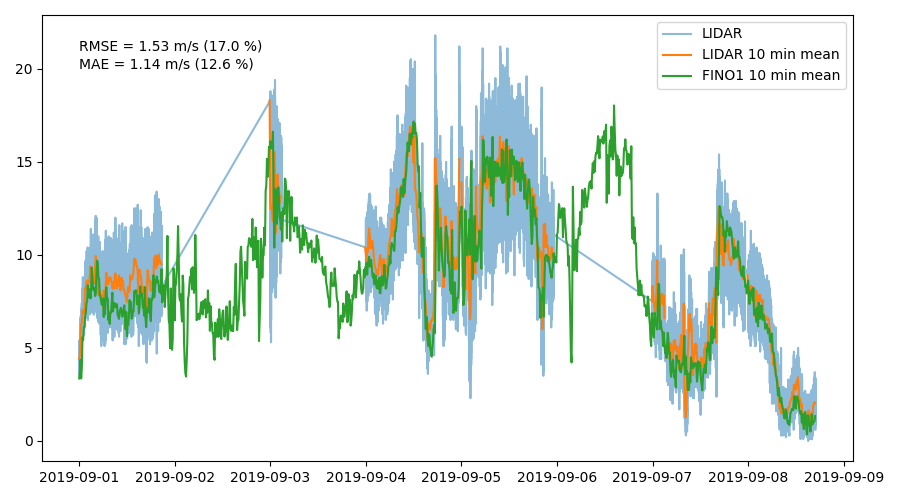

1.138451656262915
1.5310584640898441
0.12610042264790208
0.1695874553462726


In [36]:
start = pd.to_datetime('2019-09-01 00:00 UTC')
end = pd.to_datetime('2019-09-08 16:59 UTC')

plt.figure(figsize=(9,5))
plt.plot(BW77_wind[start:end].wind_speed_3, alpha=0.5, label='LIDAR')
plt.plot(BW77_wind[start:end].wind_speed_3.resample('10min').mean(), label='LIDAR 10 min mean')
plt.plot(wind[start:end].speed_mean, label='FINO1 10 min mean')
#plt.plot(wind.speed_mean.shift(-1800, freq='s'), label='FINO1 10 min mean shifted')

mean_abs_error = np.mean(np.abs(wind[start:end].speed_mean - BW77_wind[start:end].wind_speed_3.resample('10min').mean()))
root_mean_square_error = np.sqrt(
    np.mean(
        np.power((wind[start:end].speed_mean - BW77_wind[start:end].wind_speed_3.resample('10min').mean()), 2)))

print(mean_abs_error)
print(root_mean_square_error)

print(mean_abs_error/wind[start:end].speed_mean.mean())
print(root_mean_square_error/wind[start:end].speed_mean.mean())

plt.text(x=start, y=21, s='RMSE = {:1.3} m/s ({:1.3} %)'.format(root_mean_square_error,
                                                                 100*root_mean_square_error/wind[start:end].speed_mean.mean()
                                                              ))
plt.text(x=start, y=20, s='MAE = {:1.3} m/s ({:1.3} %)'.format(mean_abs_error,
                                                               100*mean_abs_error/wind[start:end].speed_mean.mean()
                                                              ))

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('turbine_04_wind_speed_comparison.png', dpi=150)

## Comparability of data - Wind speed

There seems to be a small lag between wind speeds observed at fino1 and wind speeds observed at the construction site. However, it seems, that the shift is somewhat between 10 min and 30 min. Therefore it seems plausible, that indeed the difference in position of the two data sets causes this shift.

## Comparability of data - Wind direction

<IPython.core.display.Javascript object>


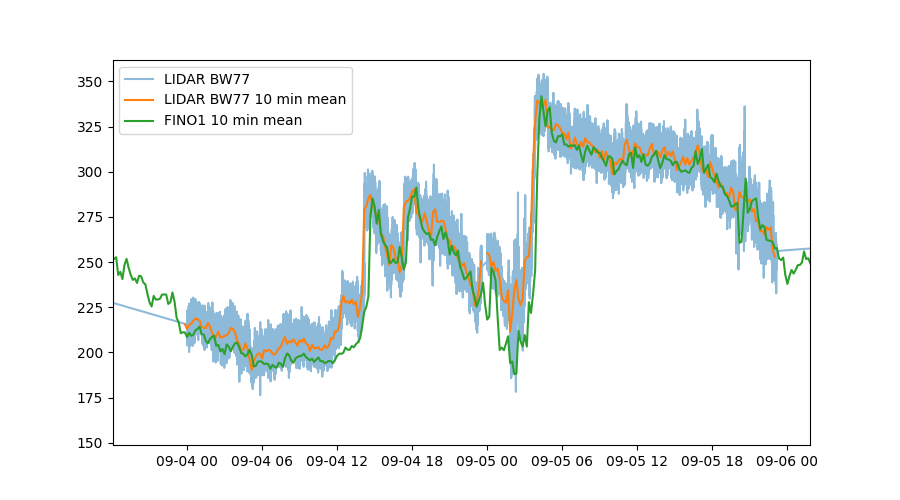

In [7]:
plt.figure(figsize=(9,5))
plt.plot(BW77_wind.wind_dir_0_corr, alpha=0.5, label='LIDAR BW77')
plt.plot(BW77_wind.wind_dir_0_corr.resample('10min').mean(), label='LIDAR BW77 10 min mean')
plt.plot(wind.dir, label='FINO1 10 min mean')
#plt.plot(wind.dir.shift(-1800, freq='s'), label='fino1 10 min mean shifted')
plt.legend()

<IPython.core.display.Javascript object>


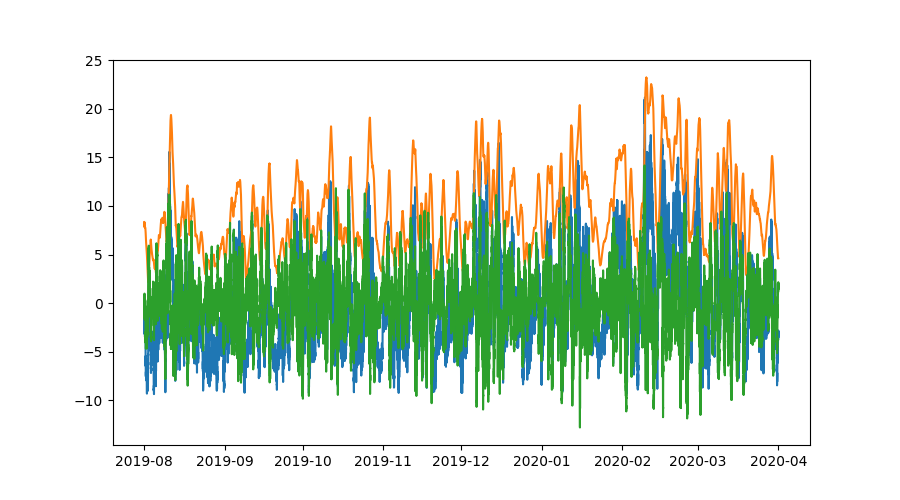

In [56]:
plt.figure(figsize=(9,5))
plt.plot(wind.speed_mean - wind.speed_mean.mean())
plt.plot(wind.speed_mean.rolling('24h').mean())
plt.plot(wind.speed_mean - wind.speed_mean.rolling('24h').mean())